# RFM Model LMS Exam

# Import DataSet and Library

In [254]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [255]:
data=pd.read_csv(r"C:\Users\TRUPTI\Desktop\Trupti_AdvMLExam\RFM data.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Data Preprocessing

In [256]:
print("Number of Rows in Dataset : ",data.shape[0])
print("Number of Columnd in Dataset :",data.shape[1])

Number of Rows in Dataset :  392735
Number of Columnd in Dataset : 9


In [257]:
# Information about datatypes
pd.DataFrame(data.dtypes)

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
TotalPrice,float64


In [258]:
print("Statistics fo Dataset :\n")
data.describe()

Statistics fo Dataset :



,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice
count,392735.000000,392735.000000,392735.000000,392735.000000,392735.000000
mean,560624.318859,10.242645,2.787111,15300.835136,18.246537
std,13113.076784,16.172009,2.704759,1709.095993,32.558080
min,536365.000000,1.000000,0.120000,12347.000000,0.120000
25%,549233.000000,2.000000,1.250000,13975.000000,4.680000
50%,561894.000000,5.000000,1.950000,15159.000000,11.700000
75%,572103.000000,12.000000,3.750000,16800.000000,19.500000
max,581587.000000,147.000000,19.960000,18287.000000,1914.240000


In [259]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392735 non-null  int64         
 1   StockCode    392735 non-null  object        
 2   Description  392735 non-null  object        
 3   Quantity     392735 non-null  int64         
 4   InvoiceDate  392735 non-null  datetime64[ns]
 5   UnitPrice    392735 non-null  float64       
 6   CustomerID   392735 non-null  float64       
 7   Country      392735 non-null  object        
 8   TotalPrice   392735 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.0+ MB


In [261]:
data.duplicated().sum()

5182

In [262]:
print('{:,} rows; {:,} columns'
      .format(data.shape[0], data.shape[1]))

print('{:,} transactions don\'t have a customer id'
      .format(data[data.CustomerID.isnull()].shape[0]))

print('Transactions timeframe from {} to {}'.format(data['InvoiceDate'].min(),
                                    data['InvoiceDate'].max()))

392,735 rows; 9 columns
0 transactions don't have a customer id
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [263]:
print("Number of Null values :\n")
data.isna().sum()

Number of Null values :



InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [264]:
# no null values found

# Model Building RFM

In [265]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [266]:
# Create snapshot date
snapshot_date = data['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


In [267]:
# Grouping by CustomerID
data_process=data.groupby(['CustomerID']).agg({
    'InvoiceDate' : lambda x:(snapshot_date -x.max()).days,
    'InvoiceNo':'count',
    'TotalPrice':'sum'})



In [268]:
data_process.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12347.0,2,181,4060.40
12348.0,75,27,1437.24
12349.0,19,71,1417.60
12350.0,310,16,294.40
12352.0,36,77,1385.74


In [269]:
# Rename the columns 
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalPrice': 'MonetaryValue'}, inplace=True)

In [270]:
data_process.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,2,181,4060.40
12348.0,75,27,1437.24
12349.0,19,71,1417.60
12350.0,310,16,294.40
12352.0,36,77,1385.74


In [326]:
data_process.shape

(4298, 9)

In [271]:
# Print top 5 rows and shape of dataframe
print(data_process.head())
print('{:,} rows; {:,} columns'.format(data_process.shape[0], data_process.shape[1]))

            Recency  Frequency  MonetaryValue
CustomerID                                   
12347.0           2        181        4060.40
12348.0          75         27        1437.24
12349.0          19         71        1417.60
12350.0         310         16         294.40
12352.0          36         77        1385.74
4,298 rows; 3 columns


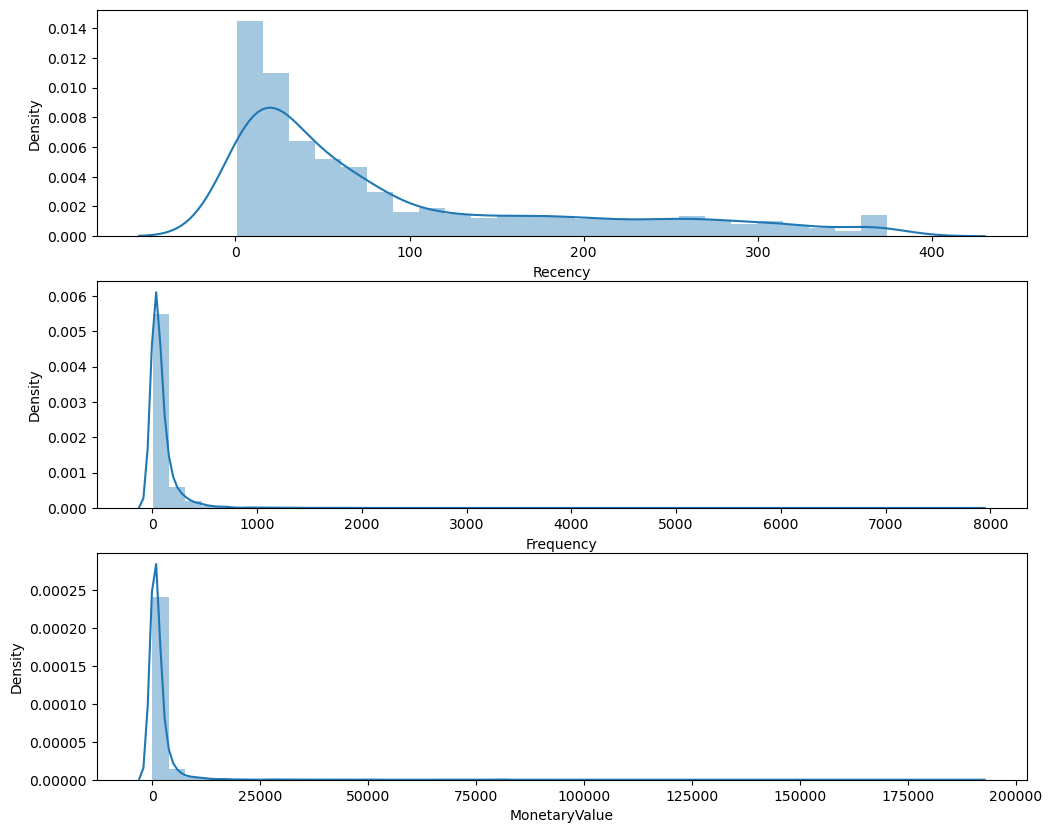

In [272]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

In [273]:
#--Calculate R and F groups--
# Create labels for Recency  
r_labels = range(1, 6)  #5, 4 , 3 , 2 , 1 

# Create labels for Frequency

f_labels = range(1, 6)      # 1 , 2 ,3 ,4 ,5

# Create labels for MonetaryValue
m_labels = range(1, 6)  # 1 , 2 ,3 ,4,5


# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=5, labels=r_labels)


# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=5, labels=f_labels)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=5, labels=m_labels)


# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)


data_process.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12347.0,2,181,4060.40,1,5,5
12348.0,75,27,1437.24,4,2,4
12349.0,19,71,1417.60,2,4,4
12350.0,310,16,294.40,5,2,2
12352.0,36,77,1385.74,3,4,4


In [274]:
#Concat RFM quartile values to create RFM Segments

In [275]:
data_process['RFM_Segment_Concat'] = data_process.R.astype(str) + data_process.F.astype(str) + data_process.M.astype(str)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12347.0,2,181,4060.40,1,5,5,155
12348.0,75,27,1437.24,4,2,4,424
12349.0,19,71,1417.60,2,4,4,244
12350.0,310,16,294.40,5,2,2,522
12352.0,36,77,1385.74,3,4,4,344


In [276]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print("Count Number of unique Segments :",rfm_count_unique.sum())

Count Number of unique Segments : 115


In [277]:
rfm.dtypes

Recency                  int64
Frequency                int64
MonetaryValue          float64
R                     category
F                     category
M                     category
RFM_Segment_Concat      object
dtype: object

In [278]:
rfm['R']=rfm['R'].astype(int)

In [279]:
rfm['F']=rfm['F'].astype(int)
rfm['M']=rfm['M'].astype(int)

In [280]:
rfm.dtypes

Recency                 int64
Frequency               int64
MonetaryValue         float64
R                       int32
F                       int32
M                       int32
RFM_Segment_Concat     object
dtype: object

In [282]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score
CustomerID,,,,,,,,
12347.0,2,181,4060.40,1,5,5,155,11
12348.0,75,27,1437.24,4,2,4,424,10
12349.0,19,71,1417.60,2,4,4,244,10
12350.0,310,16,294.40,5,2,2,522,9
12352.0,36,77,1385.74,3,4,4,344,11


In [319]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 12:
        return 'Champions'
    elif (df['RFM_Score'] >= 9):
        return 'Loyal Customers / Need Attention'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] <= 11)):
        return "Potential Loyalist / Can't Lose them"
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] <= 6)):
        return 'At Risk'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] <= 9)):
        return 'Recent Customers'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] <= 7)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 3) and (df['RFM_Score'] <= 6)):
        return 'About to Sleep'
    else:
        return 'Hibernating'

In [320]:
# Create a new variable RFM_Level
rfm['Customer_Segment'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,Customer_Segment
CustomerID,,,,,,,,,
12347.0,2,181,4060.40,1,5,5,155,11,Loyal Customers / Need Attention
12348.0,75,27,1437.24,4,2,4,424,10,Loyal Customers / Need Attention
12349.0,19,71,1417.60,2,4,4,244,10,Loyal Customers / Need Attention
12350.0,310,16,294.40,5,2,2,522,9,Loyal Customers / Need Attention
12352.0,36,77,1385.74,3,4,4,344,11,Loyal Customers / Need Attention


In [321]:
rfm.Customer_Segment.value_counts()

Customer_Segment
Loyal Customers / Need Attention        1921
Recent Customers                         662
At Risk                                  583
Champions                                576
Potential Loyalist / Can't Lose them     520
About to Sleep                            36
Name: count, dtype: int64

In [322]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency MonetaryValue      
                                        mean      mean          mean count
Customer_Segment                                                          
About to Sleep                           6.8       6.9         147.8    36
At Risk                                 49.9      14.1         231.0   583
Champions                               89.0     180.6        3279.1   576
Loyal Customers / Need Attention        83.5     130.5        2421.6  1921
Potential Loyalist / Can't Lose them   112.7      32.2         539.5   520
Recent Customers                       148.9      19.3         309.6   662

In [323]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_level_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count
Customer_Segment,,,,
About to Sleep,6.8,6.9,147.8,36
At Risk,49.9,14.1,231.0,583
Champions,89.0,180.6,3279.1,576
Loyal Customers / Need Attention,83.5,130.5,2421.6,1921
Potential Loyalist / Can't Lose them,112.7,32.2,539.5,520
Recent Customers,148.9,19.3,309.6,662


# Pareto Principal

In [324]:
Pareto=pd.pivot_table(rfm,index=["Customer_Segment"],values=["MonetaryValue"],aggfunc=[np.sum,len])
Pareto

,sum,len
,MonetaryValue,MonetaryValue
Customer_Segment,,
About to Sleep,5322.41,36
At Risk,134660.61,583
Champions,1888735.27,576
Loyal Customers / Need Attention,4651871.29,1921
Potential Loyalist / Can't Lose them,280520.88,520
Recent Customers,204943.07,662


Text(0.5, 0, 'Name of Customer_Segment')

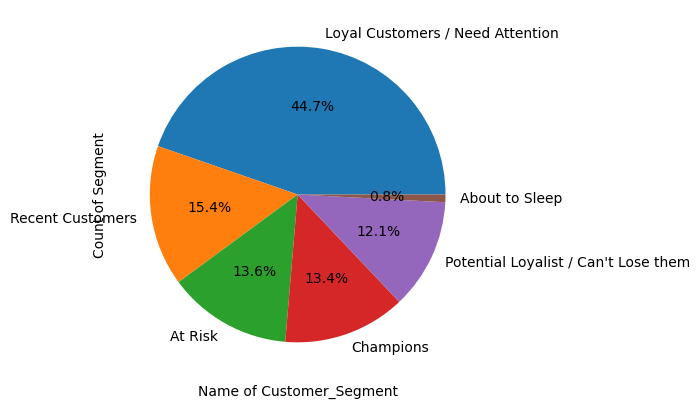

In [333]:
rfm["Customer_Segment"].value_counts().head(10).plot.pie(autopct="%.1f%%") # Top 10 Times of the day at which the most number of messages were sent
plt.ylabel('Count of Segment')
plt.xlabel('Name of Customer_Segment')

# Interpetation
13.4% of Customers are Champions.

44.7% ( 1921 / 4298 ) of customer give 83% profit which require more attention.

15% ( 662/ 4298 ) of customer have not recent from last 4 month ( 149 / 365 ).

13.6% of customers are at Risk.

12 % of Customer are Potential Loyalist.

0.8% of customers about to sleep.



# Conclusion :

Loyal Cutomers are the most important customer for bussiness point. whose gives more profit